In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# Read CSV files

train_raw = pd.read_csv('train_raw.csv',index_col=0)
test_raw = pd.read_csv('test_raw.csv',index_col=0)
train_loc = pd.read_csv('train_lat_lon.csv',index_col=0)
test_loc = pd.read_csv('test_lat_lon.csv',index_col=0)

In [3]:
# Merge location data and df
#train_raw_loc = train_raw.join(train_loc)
#test_raw_loc = test_raw.join(test_loc)
train_raw_loc = train_raw
test_raw_loc = test_raw

In [4]:
# Create corrected files
train = train_raw_loc
test = test_raw_loc

In [13]:
# Building with build_year == 215
#print train_raw_loc[train_raw_loc['build_year']==215][['build_year','lat','lon']]
#print train_raw_loc[(train_raw_loc['lat']==train_raw_loc.loc[30153,'lat']) & (train_raw_loc['lon']==train_raw_loc.loc[30153,'lon'])]['build_year']

# We can see that most buildings are between 2014 and 2017. We thus assume that this is a clerical error and the correct build_year is 2015
train.loc[30153,'build_year']=2015

In [15]:
# Building with build_year == 71
#print train_raw_loc[train_raw_loc['build_year']==71][['build_year','lat','lon']]
#print train_raw_loc[(train_raw_loc['lat']==train_raw_loc.loc[30278,'lat']) & (train_raw_loc['lon']==train_raw_loc.loc[30278,'lon'])]['build_year']

# We have no close data so we change it no NaN
train.loc[30278,'build_year']=np.NaN
#print train.loc[30278]

In [16]:
# Building with build_year == 20
#print train_raw_loc[train_raw_loc['build_year']==20][['build_year','lat','lon']]
#print train_raw_loc[(train_raw_loc['lat']==train_raw_loc.loc[13995,'lat']) & (train_raw_loc['lon']==train_raw_loc.loc[13995,'lon']) & ~pd.isnull(train_raw_loc['build_year'])]['build_year']

# Since it shares all its characteristics with the 2014 buildings we change it to 2014
train.loc[13995,'build_year']=2014
#print train.loc[13995]

In [17]:
# Building with build_year == 1691
#print train_raw_loc[train_raw_loc['build_year']==1691][['build_year','lat','lon']]
#print train_raw_loc[(train_raw_loc['lat']==train_raw_loc.loc[26335,'lat']) & (train_raw_loc['lon']==train_raw_loc.loc[26335,'lon']) & ~pd.isnull(train_raw_loc['build_year'])]['build_year']

# Same location as a 1961 building exactly same location
train.loc[26335,'build_year']=1961
#print train.loc[26335]

In [18]:
# Building with build_year == 1860
#print train_raw_loc[train_raw_loc['build_year']==1860][['build_year','lat','lon']]
#print train_raw_loc[(train_raw_loc['lat']==train_raw_loc.loc[14161,'lat']) & (train_raw_loc['lon']==train_raw_loc.loc[14161,'lon']) & ~pd.isnull(train_raw_loc['build_year'])]['build_year']

# All building in area built between 1960 and 1970.
train.loc[14161,'build_year']=1960
#print train.loc[14161]

# Other is in old part of town

In [19]:
# Buildings with build year 0, 1 or 3 are obvious wrong data
train.loc[train['build_year'].isin([0,1,3]),'build_year'] = np.NaN

In [20]:
# Building with build_year == 20052009
#print train_raw_loc[train_raw_loc['build_year']==20052009][['build_year','lat','lon']]
#print train_raw_loc[(train_raw_loc['lat']==train_raw_loc.loc[10092,'lat']) & (train_raw_loc['lon']==train_raw_loc.loc[10092,'lon']) & ~pd.isnull(train_raw_loc['build_year'])]['build_year']

# Other transactions at same location all 2009
train.loc[10092,'build_year']=2009
#print train.loc[10092]

In [21]:
# Building with build_year == 4965
#print train_raw_loc[train_raw_loc['build_year']==4965][['build_year','lat','lon']]
train.loc[15223,'build_year']=1965
#print train.loc[15223]

In [22]:
# Max_floor = 99
#print train_raw_loc[train_raw_loc['max_floor']==99][['max_floor','lat','lon']]
train.loc[20725,'max_floor']=9
train.loc[21737,'max_floor']=17 #Average of location (all between 14 and 25)
train.loc[21855,'max_floor']=25 #All at this location have 25

In [23]:
train.loc[train['max_floor']==0,'max_floor'] = np.NaN

In [24]:
train.loc[train['max_floor']<train['floor'],'max_floor'] = np.NaN

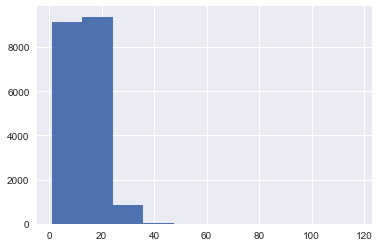

In [25]:
train['max_floor'].hist()

In [26]:
train.loc[train['floor']==0,'floor'] = np.NaN

In [35]:
train.loc[((train['full_sq']==1) & (train['life_sq']==1) & (train['floor']==1)) | ((train['full_sq']==0) & (train['life_sq']==0) & (train['floor']==0)),['full_sq','life_sq','floor','max_floor','num_room','kitch_sq','state']] = np.NaN

In [37]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [105]:
X = train_raw_loc[['lat', 'lon', 'build_year','full_sq']]
X = X.dropna(axis=0, how='any')

y = X['build_year']
X = X[['lat','lon','full_sq']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.004, random_state=0)

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [90]:
db = DBSCAN(eps=0.02).fit(X_train)

In [91]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)



Estimated number of clusters: 731


C:\Users\jules\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 15965 but corresponding boolean dimension is 15901


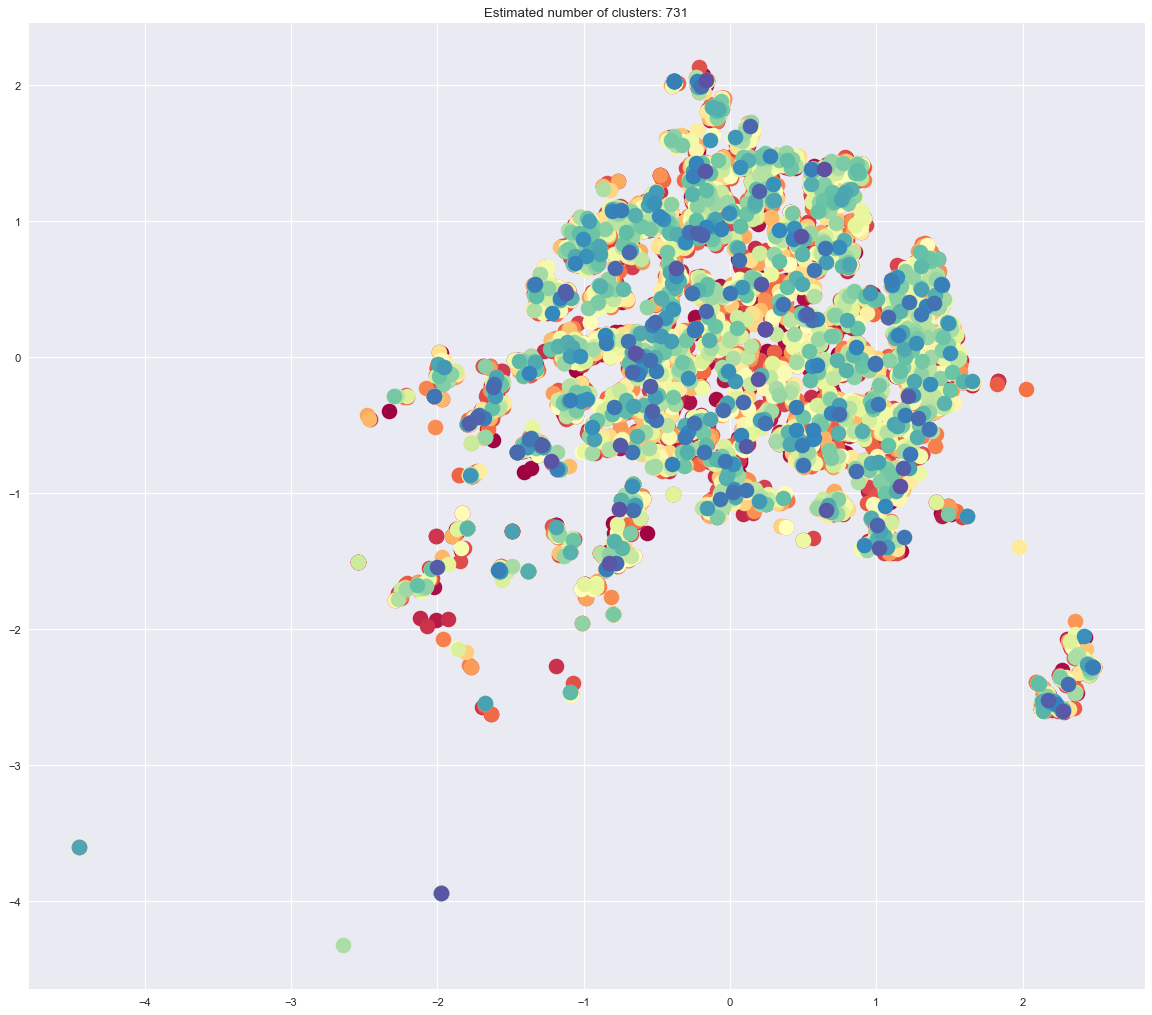

In [92]:
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [93]:
y_test_label = np.zeros(shape=(len(db.labels_),2))
y_test_label[:,0] = y_train
y_test_label[:,1] = db.labels_
avg_build_year = pd.DataFrame(y_test_label).groupby(1).mean()
avg_build_year.columns = ['mean']
std_build_year = pd.DataFrame(y_test_label).groupby(1).std()
std_build_year.columns = ['std']
count_build_year = pd.DataFrame(y_test_label).groupby(1).count()
count_build_year.columns = ['count']
print std_build_year.join(count_build_year).join(avg_build_year)

              std  count         mean
1                                    
-1.0    22.143609   6551  1986.125935
 0.0    22.567676      5  1998.400000
 1.0     9.894684      7  1987.714286
 2.0    14.131672    114  1971.728070
 3.0    15.534188    185  1988.664865
 4.0    17.783960     13  1975.538462
 5.0    12.749292     10  2007.100000
 6.0     0.786245     11  2015.272727
 7.0    10.326111     21  1983.142857
 8.0    13.450541     72  1986.111111
 9.0    22.668028     20  1982.050000
 10.0    8.928589     12  1980.083333
 11.0   19.316444      8  1976.375000
 12.0    2.695896      8  1966.125000
 13.0    8.662895     18  1999.111111
 14.0    6.629762     47  1964.787234
 15.0   10.398064    152  1968.802632
 16.0    0.500000      9  2014.666667
 17.0    2.604026     15  1977.266667
 18.0   13.399350     99  1969.626263
 19.0   17.603815     96  1988.479167
 20.0    8.272094     24  1970.583333
 21.0   13.065810     65  2002.815385
 22.0   10.031379     21  2009.857143
 23.0    2.3

In [132]:
idx_test = np.zeros(len(y_test))
X_test = np.array(X_test)
y_test = np.array(y_test)
db.components_ = np.array(db.components_)
for j, x in enumerate(X_test):
    print x
    idx = -1
    min_dist = 1e9
    for i, cluster in enumerate(db.components_[1:]):
        if np.sum((x-cluster)**2) < min_dist:
            idx = i
            min_dist = np.sum((x-cluster)**2)
    idx_test[j] = idx

[ 55.89961  37.56966]
[ 55.59628  37.66185]
[ 55.79712  37.56194]
[ 55.76232  37.54832]
[ 55.68486  37.66933]
[ 55.77798  37.49544]
[ 55.75178  37.83577]
[ 55.70216  37.82   ]
[ 55.57085  37.47434]
[ 55.74518  37.62711]
[ 55.49132  37.30598]
[ 55.8686   37.64245]
[ 55.54308  37.14377]
[ 55.69519  37.60514]
[ 55.84138  37.53356]
[ 55.67668  37.66325]
[ 55.75397  37.62037]
[ 55.69195  37.72852]
[ 55.53798  37.48687]
[ 55.87219  37.5017 ]
[ 55.80848  37.7886 ]
[ 55.654    37.59162]
[ 55.88177  37.5985 ]
[ 55.77757  37.57998]
[ 55.76344  37.6063 ]
[ 55.63269  37.32573]
[ 55.71917  37.41076]
[ 55.6823   37.75409]
[ 55.80141  37.4853 ]
[ 55.8201   37.46171]
[ 55.67741  37.60593]
[ 55.67258  37.76129]
[ 55.78832  37.55725]
[ 55.81297  37.59297]
[ 55.58124  37.47536]
[ 55.6687   37.65718]
[ 55.52464  37.37443]
[ 55.46893  37.29096]
[ 55.52664  37.50568]
[ 55.86598  37.61335]
[ 55.73698  37.48265]
[ 55.71764  37.89139]
[ 55.72162  37.61044]
[ 55.88229  37.64783]
[ 55.48901  37.29536]
[ 55.63246

In [46]:
print std_scaler.inverse_transform(X)[0]

[   11.          5.          2.       1907.         55.73525    37.58869]


In [134]:
print idx_test
print avg_build_year

[ 3540.  6151.  8796.  1401.  7349.  5482.   743.  8468.   580.  2904.
  3190.   892.    10.  5995.  6426.  4314.   364.  6076.   996.  8054.
  6596.   425.  8244.  4066.  5679.   418.  1370.  1575.  2467.  4899.
  3339.  7558.  1672.  8059.  3689.   103.   466.  3534.   244.  4573.
  1946.   485.  4131.  3949.  2010.  1402.  3552.  5798.   100.  8837.
  1570.  5539.  3342.   131.  1886.    39.  7707.   824.  7945.  2337.
  1530.  1133.  8592.  2937.]
                 0
1                 
-1.0   1989.287879
 0.0   1978.717532
 1.0   1979.975168
 2.0   1984.643750
 3.0   2013.983051
 4.0   1998.962264
 5.0   2014.428571
 6.0   1978.230769
 7.0   1996.937500
 8.0   2003.920000
 9.0   2012.798851
 10.0  2001.429134
 11.0  1979.039604
 12.0  2014.222222
 13.0  2007.571429
 14.0  1982.254545
 15.0  1997.368421
 16.0  1995.738095
 17.0  2004.375635
 18.0  2015.680000
 19.0  1992.010000
 20.0  1994.333333
 21.0  2005.647727
 22.0  1992.142857
 23.0  2009.638889
 24.0  2012.250000
 25.0  1973.

In [161]:
for i, idx in enumerate(idx_test):
    print y_train.iloc[int(idx)], y_test[i]

2015.0 1977.0
2015.0 1994.0
1977.0 1958.0
2015.0 2015.0
2013.0 1970.0
2016.0 1958.0
2008.0 1974.0
1958.0 1997.0
1976.0 2013.0
1982.0 1930.0
1977.0 1979.0
2007.0 1977.0
1966.0 2015.0
2004.0 1967.0
1971.0 1988.0
2016.0 1965.0
1982.0 2014.0
2008.0 2003.0
1978.0 2007.0
2014.0 2001.0
1969.0 1960.0
2015.0 2013.0
1999.0 1979.0
1992.0 1960.0
2017.0 1940.0
1968.0 2016.0
1972.0 1964.0
1959.0 1963.0
1989.0 1958.0
1960.0 1960.0
2003.0 1968.0
1964.0 2004.0
2015.0 1964.0
1984.0 1957.0
1958.0 2011.0
1987.0 1966.0
2014.0 2014.0
2015.0 1975.0
1900.0 2015.0
2013.0 1976.0
1960.0 1958.0
2014.0 2005.0
1989.0 1986.0
2014.0 1967.0
2017.0 2008.0
1978.0 2014.0
1960.0 2011.0
1967.0 1981.0
2002.0 2016.0
2013.0 1960.0
2006.0 1982.0
1961.0 1984.0
1989.0 1967.0
1974.0 1979.0
1961.0 1974.0
2014.0 1963.0
1966.0 1990.0
1965.0 2005.0
1993.0 2007.0
2003.0 1979.0
1978.0 2013.0
2015.0 1931.0
1985.0 2008.0
1980.0 1969.0


In [147]:
print np.where(db.core_sample_indices_ ==3540)

(array([3523], dtype=int64),)


In [149]:
len(db.core_sample_indices_)

15829

In [157]:
print X_train.iloc[35]

lat    55.68272
lon    37.92797
Name: 21345, dtype: float64


In [38]:
from sklearn.cluster import MeanShift

In [49]:
X = train_raw_loc[['lat', 'lon', 'build_year','floor','area_m']]
X = X.dropna(axis=0, how='any')

y = X['build_year']
X = X[['lat','lon','area_m','floor']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [50]:
kmeans = MeanShift(bandwidth =0.04).fit(X_train)


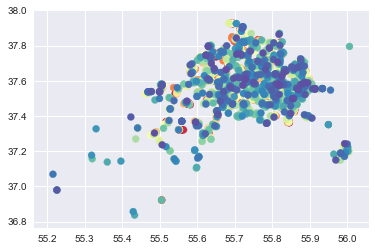

In [51]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(kmeans.cluster_centers_)))
centroids = np.array(kmeans.cluster_centers_)
plt.scatter(centroids[:,0],centroids[:,1] ,c=colors)


In [52]:
y_test_label = np.zeros(shape=(len(kmeans.labels_),2))
y_test_label[:,0] = y_train
y_test_label[:,1] = kmeans.labels_
avg_build_year = pd.DataFrame(y_test_label).groupby(1).mean()
avg_build_year.columns = ['mean']
std_build_year = pd.DataFrame(y_test_label).groupby(1).std()
std_build_year.columns = ['std']
count_build_year = pd.DataFrame(y_test_label).groupby(1).count()
count_build_year.columns = ['count']
a = std_build_year.join(count_build_year).join(avg_build_year)
print sum(a[a['count']>1]['count'])
print a[a['count']>1].sort_values('count', ascending = False).head(20)

12185
            std  count         mean
1                                  
1.0    4.538248     31  2000.935484
0.0    7.504864     30  1964.766667
2.0    7.906531     28  1991.071429
3.0    7.913554     28  1992.571429
4.0   29.669319     28  1999.250000
5.0   13.937265     28  1967.107143
8.0    5.594191     28  2001.964286
6.0    4.616026     27  2012.333333
9.0    1.197433     26  2014.076923
19.0   4.507088     26  2000.923077
7.0    1.106623     26  2014.769231
11.0  10.428806     25  1971.520000
28.0   7.002857     25  1994.040000
10.0   7.918965     25  2012.280000
12.0   1.122078     24  2013.958333
13.0   8.175609     24  1979.166667
14.0   5.241971     24  1962.000000
21.0   6.437907     23  1993.913043
36.0  15.485554     23  1974.434783
23.0  15.240107     23  1979.521739


In [53]:
pred = kmeans.predict(X_test)

In [54]:
print np.mean(a['std'])

10.8052839548


In [55]:
print max(pred)

2390


In [56]:
pred_build = np.zeros(len(y_test))

In [57]:
for i in range(len(y_test)):
    pred_build[i] = a.iloc[pred[i]]['mean']

In [58]:
print np.sum(abs(pred_build-y_test))/len(y_test)

10.057307998
